# Task 3 - Boston Housing

Reference : \
https://www.kaggle.com/c/boston-housing \
Mengenal Data : \
Data yang akan dianalisis dikumpulkan oleh Harrison dan Rubinfeld pada tahun 1978 dengan tujuan untuk mengetahui apakah udara bersih mempengaruhi nilai rumah di Boston atau tidak.\
Laporan ini berusaha untuk menguji pengaruh beberapa atribut lingkungan terhadap harga perumahan, dalam upaya untuk menemukan variabel penjelas yang paling cocok.

## I. Loading Dataset

In [1]:
#Importing Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('boston_housing.csv')
df.name = 'Boston Default'
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Mengetahui size df
print(df.size)
print(df.shape)

7084
(506, 14)


In [4]:
#Melihat informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#Melihat informasi null
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

<b>Descriptive Information :</b> \
<i>The medv variable is the target variable</i> \
crim  : per capita crime rate by town \
zn    : proportion of residential land zoned for lots over 25,000 sq.ft. \
indus : proportion of non-retail business acres per town. \
chas  : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). \
nox   : nitrogen oxides concentration (parts per 10 million). \ 
rm    : average number of rooms per dwelling. \
age   : proportion of owner-occupied units built prior to 1940. \
dis   : weighted mean of distances to five Boston employment centres. \
rad   : index of accessibility to radial highways. \
tax   : full-value property-tax rate per USD 10,000. \
ptratio : pupil-teacher ratio by town. \
black : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town. \
lstat : lower status of the population (percent). \
medv  : median value of owner-occupied homes in $1000s. 

## II. Data Preprocessing

### 1. Visualisasi

C:\Users\Fakhrist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


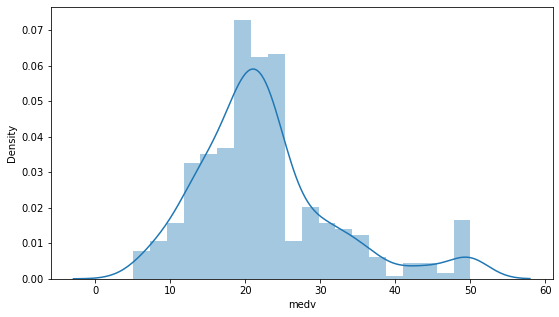

In [6]:
plt.figure(figsize=(9,5))
sns.distplot(df['medv'], bins=20)
#sns.histplot(df['medv'], color="red", kde=True, stat="density", linewidth=0)
plt.show()

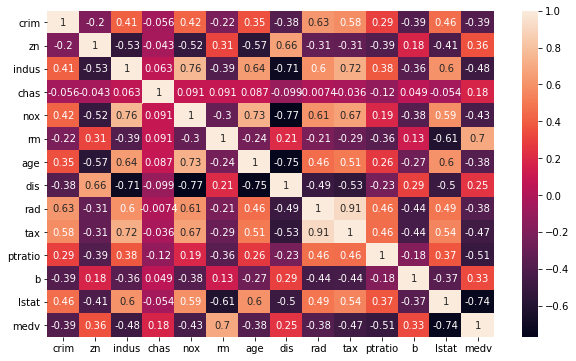

In [7]:
#Melihat korelasi antar feature dengan heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

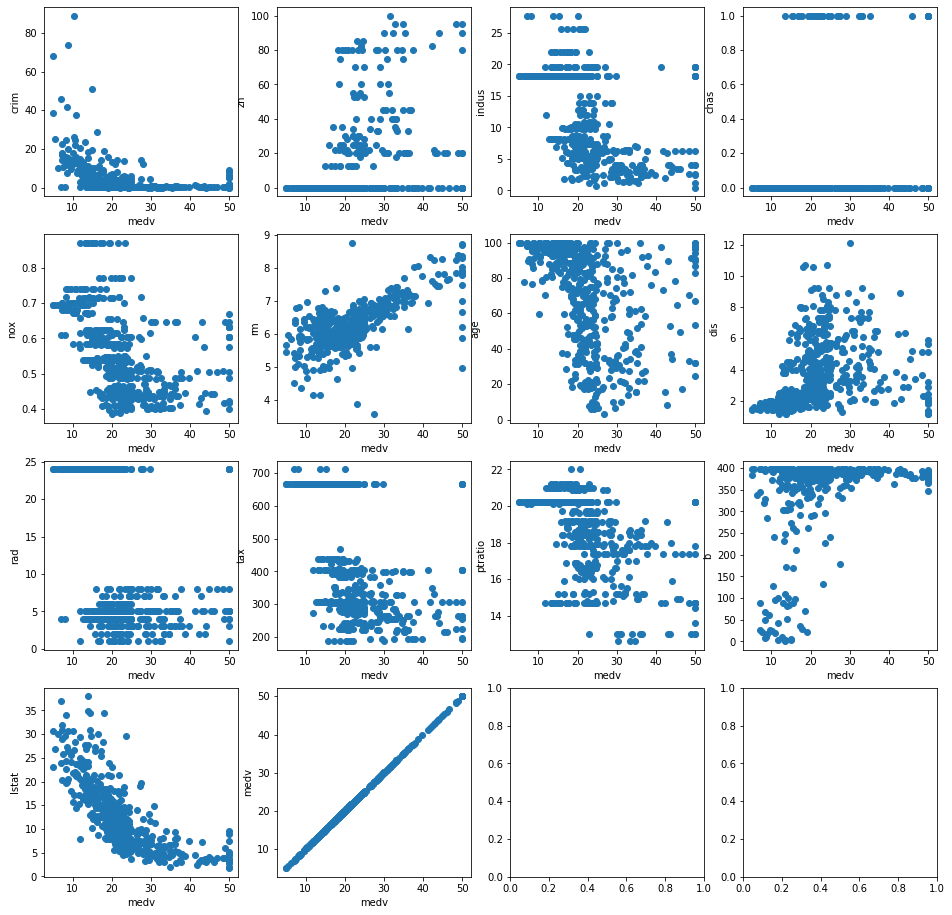

In [8]:
#Melihat pola hubungan antar feature dengan medv dengan scatter
def scatterplotBoston(label,xAxis,yAxis):
    axis[xAxis,yAxis].scatter(df["medv"],df[label])
    axis[xAxis,yAxis].set_xlabel("medv")
    axis[xAxis,yAxis].set_ylabel(label)

figure, axis = plt.subplots(4, 4 ,figsize = (16,16))    
i = j = 0
for column in df:
    if i > 3 :
        i = 0
        j += 1
    scatterplotBoston(column,j,i)
    i += 1

plt.show()

Asumsi :
- Faktor kriminalitas, keberadaan bisnis non-ritel, aksebilitas jalan raya (tidak menjadi faktor pendorong harga rumah)
- lstat memiliki korelasi yang sangat rendah
- ada kecendrungan harga tinggi karena tanah yang luas + kamar yang banyak
- dimasa tersebut, faktor kesehatan tidak mempengaruhi harga rumah. Namun menjadi pertimbangan di rentang usia tertentu
- Isu Rasial sangat berperan memberikan harga yang tinggi

### 2. Drop Column

In [9]:
#3 Column yang akan di drop
dropped = ['tax', 'ptratio']

In [10]:
df.drop(dropped, inplace=True, axis=1)

In [11]:
df.shape

(506, 12)

### 3. Outliers

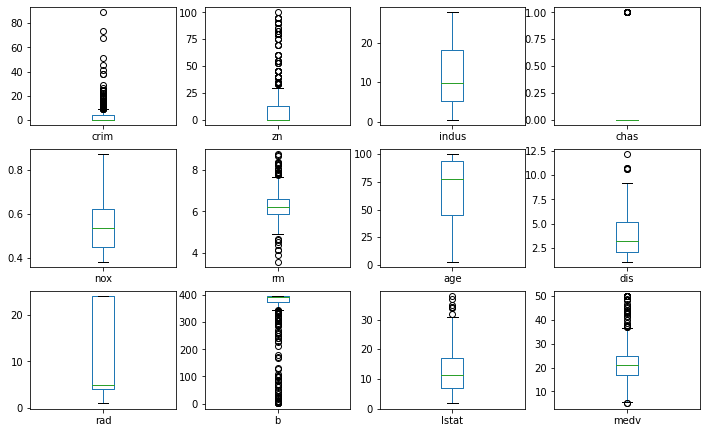

In [12]:
df.plot(kind='box', subplots = True, layout = (4,4), figsize = (12,10))
plt.show()

#### a. Metode Z-Score

In [13]:
from scipy.stats import zscore
boston_zsc = df
boston_zs = boston_zsc.apply(zscore)

In [14]:
listRow = []
for column in boston_zs:
    i = 0
    for row in boston_zs[column]:
        if row > 3 or row < -3:
            listRow.append(i)
        i+=1

In [15]:
def removeDuplicate(x):
  return list(dict.fromkeys(x))

listNew = removeDuplicate(listRow)
print(listNew)

[380, 398, 404, 405, 410, 414, 418, 427, 55, 56, 57, 199, 200, 201, 202, 203, 204, 256, 283, 284, 347, 353, 142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216, 218, 219, 220, 221, 222, 234, 236, 269, 273, 274, 276, 277, 282, 356, 357, 358, 363, 364, 369, 370, 372, 225, 257, 262, 365, 367, 374, 406, 351, 352, 354, 355, 102, 411, 412, 415, 416, 419, 423, 424, 425, 426, 429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466, 141, 373]


In [16]:
boston_zsc.drop(boston_zsc.index[listNew], inplace=True)

In [17]:
boston_zsc.shape

(415, 12)

#### b. Metode IQR

In [18]:
# Metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

crim      2.07111
zn       12.50000
indus    12.97000
chas      0.00000
nox       0.16000
rm        0.67350
age      50.15000
dis       3.08410
rad       4.00000
b        19.02000
lstat     9.00500
medv      7.25000
dtype: float64


In [19]:
boston_iqr = df[~((df <(Q1-1.5*IQR))|(df >(Q3 + 1.5*IQR))).any(axis=1)]
boston_iqr.shape

(224, 12)

### 4. Normalisasi Data

In [25]:
def histBoston(dataframe):   
    figure, axis = plt.subplots(3, 4 ,figsize = (16,16))    
    i = j = 0
    for column in dataframe:
        if i > 3 :
            i = 0
            j += 1
        axis[j, i].hist(dataframe[column])
        axis[j, i].set_xlabel(column)
        axis[j, i].set_ylabel("value")        
        i += 1

    plt.show()

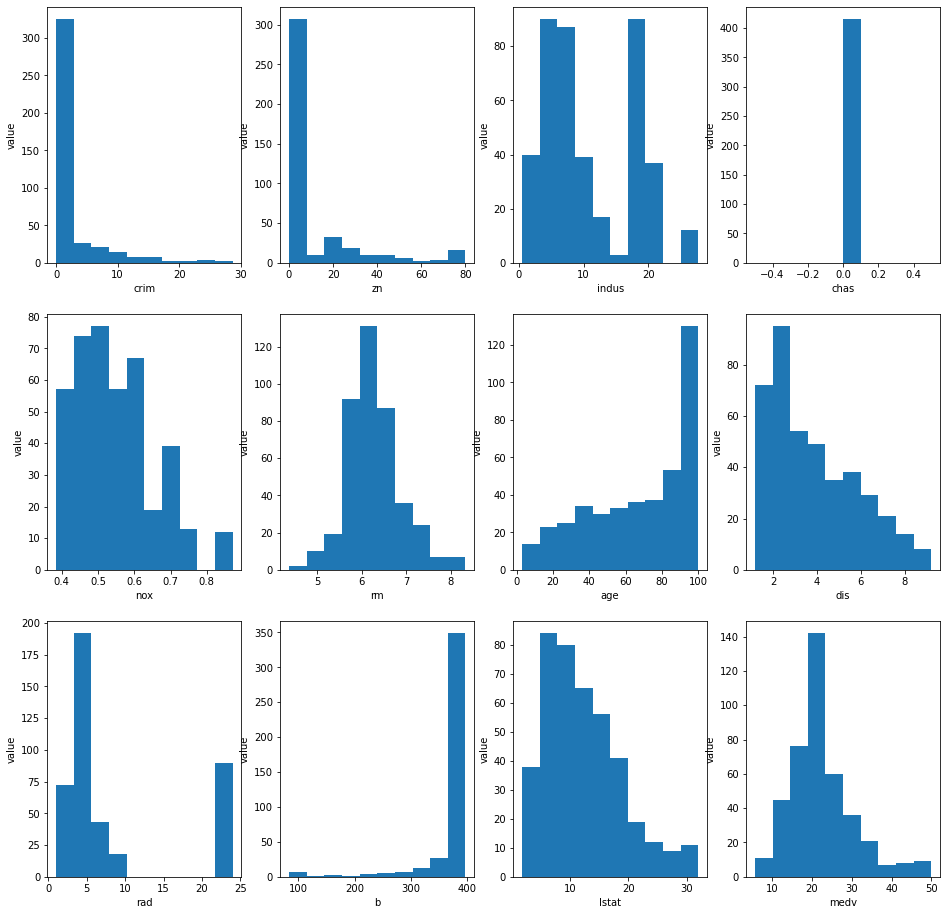

In [26]:
histBoston(boston_zsc)

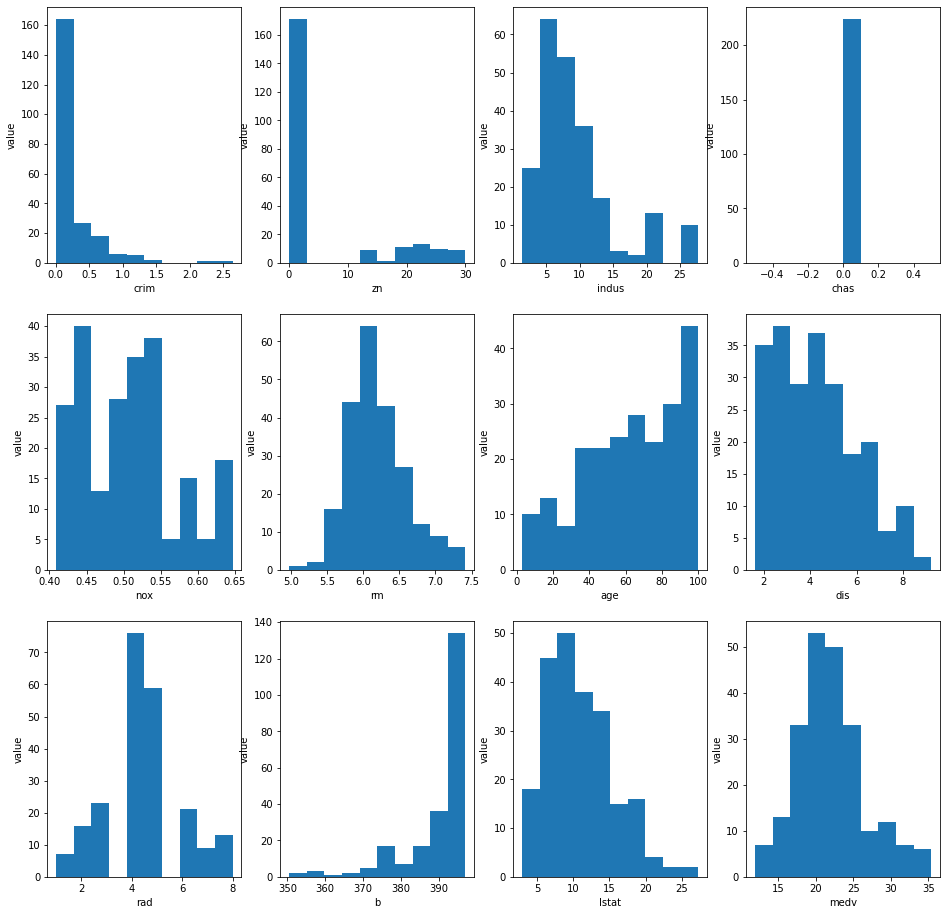

In [27]:
histBoston(boston_iqr)

In [28]:
# Label / Feature yang akan di normalisasi
# (medv tidak di normalisasi karena nilai target)
# Metode Normalisasi : 
# StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer,Normalizer 
labelNorm = ['crim', 'zn', 'indus','nox', 'rm', 'age', 'dis', 'rad', 'b', 'lstat']

##### a.Using Standard Scaller [df to boston_sc]

In [22]:
#Std Scaller
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
#Preparation
#Copy dataframe
boston_sc = boston_zsc
boston_sc.name = 'Boston StandardScaler'
#Fungsi Normalisasi Std Scaller
def bostonStdScaller(label) :
    boston_sc[label] = sc.fit_transform(boston_sc[[label]])

In [24]:
#Proses Normalisasi
for column in labelNorm:
    bostonStdScaller(column)

In [ ]:
#histBoston(boston_sc)

##### b.Using Min Max Scaller [df to boston_mm]

In [41]:
#Min Max Scaller
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [42]:
#Preparation
#Copy dataframe
boston_mm = boston_zsc
boston_mm.name = 'Boston MinMaxScaler'
#Fungsi Normalisasi Min Max Scaller
def bostonMinMaxScaler(label) :
    boston_mm[label] = mm.fit_transform(boston_mm[[label]])

In [43]:
#Proses Normalisasi
for column in labelNorm:
    bostonMinMaxScaler(column)

In [33]:
#histBoston(boston_mm)

##### c.Using Robust Scaling [df to boston_rs]

In [29]:
#Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [30]:
#Preparation
#Copy dataframe
boston_rs = boston_zsc
boston_rs.name = 'Boston RobustScaler'
#Fungsi Normalisasi Robust Scaling
def bostonRobust(label):
    boston_rs[label] = rs.fit_transform(boston_rs[[label]])

In [31]:
#Proses Normalisasi
for column in labelNorm:
    bostonRobust(column)

In [ ]:
#histBoston(boston_rs)

##### d.Using MaxAbsScaler [df to boston_ms]

In [145]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
ms = MaxAbsScaler()

In [146]:
#Preparation
#Copy dataframe
boston_ms = boston_zsc
boston_ms.name = 'Boston MaxAbsScaler'
#Fungsi Normalisasi MaxAbsScaler 
def bostonMaxAbsScaler(label):
    boston_ms[label] = ms.fit_transform(boston_ms[[label]])

In [147]:
#Proses Normalisasi
for column in labelNorm:
    bostonMaxAbsScaler(column)

In [34]:
#histBoston(boston_ms)

##### e.Using PowerTransformer [df to boston_pt]

In [149]:
#PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [150]:
#Preparation
#Copy dataframe
boston_pt = boston_zsc
boston_pt.name = 'Boston PowerTransformer'
#Fungsi Normalisasi PowerTransformer 
def bostonPowerTransformer(label):
    boston_pt[label] = pt.fit_transform(boston_pt[[label]])

In [151]:
#Proses Normalisasi
for column in labelNorm:
    bostonPowerTransformer(column)

In [36]:
#histBoston(boston_pt)

##### f.Using QuantileTransformer [df to boston_qt]

In [153]:
#QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=506, random_state=0)

In [154]:
#Preparation
#Copy dataframe
boston_qt = boston_zsc
boston_qt.name = 'Boston QuantileTransformer'
#Fungsi Normalisasi QuantileTransformer 
def bostonQuantileTransformer(label):
    boston_qt[label] = qt.fit_transform(boston_qt[[label]])

In [155]:
#Proses Normalisasi
for column in labelNorm:
    bostonQuantileTransformer(column)

In [37]:
#histBoston(boston_qt)

##### g.Using QuantileTransformer (with Gaussian output) [df to boston_qg]

In [157]:
#QuantileTransformer with Gaussian
qg = QuantileTransformer(n_quantiles=506, random_state=0, output_distribution='normal')

In [158]:
#Preparation
#Copy dataframe
boston_qg = boston_zsc
boston_qg.name = 'Boston QTrans with Gaussian'
#Fungsi Normalisasi QuantileTransformer with Gaussian
def bostonQuantileTransformerGaussian(label):
    boston_qg[label] = qg.fit_transform(boston_qg[[label]])

In [159]:
#Proses Normalisasi
for column in labelNorm:
    bostonQuantileTransformerGaussian(column)

In [38]:
#histBoston(boston_qg)

##### g.Using Normalizer [df to boston_nr]

In [161]:
#Normalizer
from sklearn.preprocessing import Normalizer
nr = Normalizer()

In [162]:
#Preparation
#Copy dataframe
boston_nr = boston_zsc
boston_nr.name = 'Boston Normalizer '
#Fungsi Normalisasi Normalizer 
def bostonNormalizer(label):
    boston_nr[label] = nr.fit_transform(boston_nr[[label]])

In [163]:
#Proses Normalisasi
for column in labelNorm:
    bostonNormalizer(column)

In [39]:
#histBoston(boston_nr)

## III. Training Process

In [32]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [33]:
#Buat function untuk otomatisasi training & testing
#dengan test_size = 0.2, maka train_data = 404, test_data 102 baris
def modelTrainTest(dfboston):
    #Membagi size antara data training dan data test 8:2
    train_data, test_data = train_test_split(dfboston, test_size = 0.2, random_state = 12)
    
    #Pemilihan Feature & Target untuk Train Data
    train_feature = train_data.drop(['medv'], axis = 1)
    train_target = train_data['medv']
    #Pemilihan Feature & Target untuk Test Data
    test_feature = test_data.drop(['medv'], axis = 1)
    test_target = test_data['medv']
    
    #Training dengan Linear Regression
    lr.fit(X = train_feature, y = train_target )
    valTrain = lr.score(X = train_feature, y = train_target)
    
    #Predict Test Data
    Predict = lr.predict(test_feature)
    valTest = r2_score(test_target,Predict)
    
    #Cetak Evaluasi
    print('Training : ',valTrain)
    print('Testing : ',valTest)

In [34]:
modelTrainTest(boston_rs)

Training :  0.6673912288875179
Testing :  0.8150160962442139
